In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df=pd.read_csv ('../ressources/inca3/description-indiv.csv', delimiter=';')
df_OCCASIONS= pd.read_csv("../ressources/inca3/occasions.csv", delimiter=';')
df_consumption = pd.read_csv("../ressources/inca3/conso-compo-alim-vf-mad-datagouv2021.csv", delimiter=';')
df_nomen= pd.read_csv("../ressources/inca3/nomenclature-vf-mad-datagouv2021.csv", delimiter=';')
df_nomen_inca2 = pd.read_csv("../ressources/Nomenclature_3.csv", sep=";", encoding="windows-1252")

C:\Users\nigit\AppData\Local\Temp\ipykernel_18468\171916434.py:1: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv ('../ressources/inca3/description-indiv.csv', delimiter=';')
C:\Users\nigit\AppData\Local\Temp\ipykernel_18468\171916434.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_OCCASIONS= pd.read_csv("../ressources/inca3/occasions.csv", delimiter=';')
C:\Users\nigit\AppData\Local\Temp\ipykernel_18468\171916434.py:3: DtypeWarning: Columns (19,31,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_consumption = pd.read_csv("../ressources/inca3/conso-compo-alim-vf-mad-datagouv2021.csv", delimiter=';')
C:\Users\nigit\AppData\Local\Temp\ipykernel_18468\171916434.py:4: DtypeWarning: Columns (11,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nomen= pd.read_csv("../ressources/inca3/nomencl

In [4]:
df_nomen.shape, df_nomen_inca2.shape

((36734, 36), (1343, 6))

In [5]:
df_nomen.head(1)

gpe_INCA3  aliment_code_INCA3            aliment_libelle_INCA3  \
0          1                2641  biscotte au froment (classique)   

  aliment_synonyme_INCA3 aliment_libelle_INCA3_EN  gpe_GloboDiet  \
0                    NaN            rusk, wheaten              6   

   gpe_GloboDiet_EN  sgpe_GloboDiet  sgpe_GloboDiet_EN  ssgpe_GloboDiet  \
0                 6              63                 63            632.0   

   ssgpe_GloboDiet_EN facette_01  facette_02  facette_03 facette_04  \
0               632.0        NaN         NaN         NaN        NaN   

   facette_05 facette_06 facette_07  facette_08 facette_09  facette_10  \
0         NaN        NaN        NaN         NaN        NaN         NaN   

   facette_13  facette_14  facette_19 facette_20 facette_25  facette_27  \
0         NaN         NaN         NaN        NaN        NaN         NaN   

   aliment_code_FX   aliment_libelle_FX gpe_code_FX  \
0  A006M#F10.A07XK  Rusk, White/refined       A000J   

                    gpe_libelle_FX sgpe_code_FX             sgpe_libelle_FX  \
0  Grains and grain-based products        A004V  Bread and similar products   

  ssgpe_code_FX ssgpe_libelle_FX  Freq  
0         A006M             Rusk   384

In [6]:
df_consumption.head(1)

POPULATION      NOIND  NUM_LIGNE  R24_num  R24_nombre  R24_pond occ_hdeb  \
0       Pop3  110100101          3        1           3       1.0    11:00   

   occ_type  occ_lieu occ_alim_libelle  occ_alim_num  occ_alim_num_seq  \
0         4         1              eau             1                 1   

   gpe_INCA3  aliment_code_INCA3 aliment_libelle_INCA3 aliment_code_FX  \
0         30                1504      eau (du robinet)           A03DL   

  aliment_libelle_FX  qte_conso  qte_conso_pond facette_01 facette_01_libelle  \
0          Tap water      147.5           147.5        999      non renseigné   

   facette_02 facette_02_libelle  facette_03 facette_03_libelle facette_04  \
0         999      non renseigné         999      non renseigné        999   

  facette_04_libelle  facette_05 facette_05_libelle facette_06  \
0      non renseigné         999      non renseigné        999   

  facette_06_libelle facette_07 facette_07_libelle  facette_08  \
0      non renseigné        999      non renseigné         999   

  facette_08_libelle facette_09 facette_09_libelle  facette_10  \
0      non renseigné        999      non renseigné         999   

  facette_10_libelle  facette_12 facette_12_libelle  aliment_marque_bio  \
0      non renseigné         999      non renseigné                 NaN   

   aliment_marque_enrichi  facette_13 facette_13_libelle  facette_14  \
0                     NaN         999      non renseigné         999   

  facette_14_libelle  facette_19 facette_19_libelle facette_20  \
0      non renseigné         999      non renseigné        999   

  facette_20_libelle facette_25 facette_25_libelle  facette_27  \
0      non renseigné        999      non renseigné         999   

  facette_27_libelle  aet  aesa  proteines  glucides  sucres  amidon  polyols  \
0      non renseigné  0.0   0.0        0.0       0.0     0.0     0.0      0.0   

   fibres  acides_organiques  lipides  ags  ag_16_0  ag_18_0  ag_14_0  \
0     0.0                0.0      0.0  0.0      0.0      0.0      0.0   

   ag_12_0  ag_10_0  ag_04_0  ag_06_0  ag_08_0  agmi  ag_18_1_ole  agpi  \
0      0.0      0.0      0.0      0.0      0.0   0.0          0.0   0.0   

   ag_18_2_lino  ag_18_3_a_lino  ag_20_4_ara  ag_20_5_epa  ag_20_6_dha  \
0           0.0             0.0          0.0          0.0          0.0   

   alcool    eau  retinol  beta_carotene  vitamine_b1  vitamine_b2  \
0     0.0  100.0      0.0            0.0          0.0          0.0   

   vitamine_b3  vitamine_b5  vitamine_b6  vitamine_b9  vitamine_b12  \
0          0.0          0.0          0.0          0.0           0.0   

   vitamine_c  vitamine_d  vitamine_e  vitamine_k2  sodium     sel  magnesium  \
0         0.0         0.0         0.0          0.0     2.4  0.0076       0.99   

   phosphore  potassium  calcium  manganese   fer  cuivre   zinc  selenium  \
0        0.0       0.73     7.13    0.00082  0.03   0.017  0.011       0.5   

   iode  
0   0.0

In [8]:
df_consumption.columns.to_list()

['POPULATION',
 'NOIND',
 'NUM_LIGNE',
 'R24_num',
 'R24_nombre',
 'R24_pond',
 'occ_hdeb',
 'occ_type',
 'occ_lieu',
 'occ_alim_libelle',
 'occ_alim_num',
 'occ_alim_num_seq',
 'gpe_INCA3',
 'aliment_code_INCA3',
 'aliment_libelle_INCA3',
 'aliment_code_FX',
 'aliment_libelle_FX',
 'qte_conso',
 'qte_conso_pond',
 'facette_01',
 'facette_01_libelle',
 'facette_02',
 'facette_02_libelle',
 'facette_03',
 'facette_03_libelle',
 'facette_04',
 'facette_04_libelle',
 'facette_05',
 'facette_05_libelle',
 'facette_06',
 'facette_06_libelle',
 'facette_07',
 'facette_07_libelle',
 'facette_08',
 'facette_08_libelle',
 'facette_09',
 'facette_09_libelle',
 'facette_10',
 'facette_10_libelle',
 'facette_12',
 'facette_12_libelle',
 'aliment_marque_bio',
 'aliment_marque_enrichi',
 'facette_13',
 'facette_13_libelle',
 'facette_14',
 'facette_14_libelle',
 'facette_19',
 'facette_19_libelle',
 'facette_20',
 'facette_20_libelle',
 'facette_25',
 'facette_25_libelle',
 'facette_27',
 'facette_2

In [5]:
df_nomen_inca2['codal'].nunique()

1343

In [7]:
df_nomen['aliment_code_INCA3'].nunique()

2857

In [4]:
df.head()

NOMEN      NOIND  ech  enf_allaite  pop1  pop2  pop3  \
0  1101001  110100101    1          NaN     1     1     1   
1  1101007  110100701    1          NaN     1     1     1   
2  1101008  110100801    1          NaN     1     1     1   
3  1101012  110101201    1          NaN     1     1     1   
4  1101014  110101401    1          NaN     1     1     1   

   pond_indiv_adu_pop1  pond_indiv_enf_pop1  pond_indiv_adu_pop2  \
0         11415.498010                  NaN         18553.734263   
1          4644.245013                  NaN          4656.461407   
2          6016.879562                  NaN          6307.757457   
3          1782.445803                  NaN          2041.062541   
4          2359.105604                  NaN          2455.423813   

   pond_indiv_enf_pop2  pond_indiv_adu_pop3  pond_indiv_enf_pop3  \
0                  NaN           20743.8570                  NaN   
1                  NaN            6559.1914                  NaN   
2                  NaN           11348.4580                  NaN   
3                  NaN            2783.3044                  NaN   
4                  NaN            5051.0601                  NaN   

   pond_men_pop1  pond_men_pop2     zae  strate      fpc1      fpc2      fpc3  \
0     397.378201     561.623547  Z01091       6  0.038265  0.166111  0.333333   
1    1561.796163    1678.940922  Z01091       6  0.038265  0.166111  0.500000   
2     437.741831     613.270384  Z01091       6  0.038265  0.166111  0.500000   
3    1612.480487    1681.567869  Z01091       6  0.038265  0.166111  1.000000   
4    1670.598497    1966.134210  Z01091       6  0.038265  0.166111  0.500000   

   saison_pop1  saison_pop2  saison_pop3  region_adm_12cl  region_inca3  \
0            1          1.0          1.0                9             6   
1            1          1.0          1.0                9             6   
2            1          1.0          1.0                9             6   
3            1          1.0          1.0                9             6   
4            1          1.0          3.0                9             6   

   agglo_5cl  sex_PS  tage_PS  tage_PS_mois  lien_rep_enf  diplome_interv  \
0          1       1        7           NaN           NaN             7.0   
1          1       2        8           NaN           NaN             7.0   
2          1       1        8           NaN           NaN             7.0   
3          1       1        8           NaN           NaN            10.0   
4          1       2        9           NaN           NaN             7.0   

   etude_4cl_interv  situ_prof_5cl_interv  atrav_interv  trav_nuit_interv  \
0                 1                     3           2.0               NaN   
1                 1                     1           NaN               4.0   
2                 1                     1           NaN               4.0   
3                 3                     1           NaN               4.0   
4                 1                     4           1.0               NaN   

   trav_nuit_2cl_interv  PCS_8cl_interv  PCS_4cl_interv  tps_travail_interv  \
0                   NaN               8               4                 NaN   
1                   2.0               1               1                 2.0   
2                   2.0               2               1                 1.0   
3                   2.0               1               1                 1.0   
4                   NaN               7               4                 1.0   

   vacances_interv  interv_PR  sex_PR  tage_PR  lien_interv_PR  lien_PS_PR  \
0                2          0       1        2             2.0         2.0   
1                1          0       1        2             1.0         1.0   
2                1          1       1        2             NaN         NaN   
3                1          1       1        2             NaN         NaN   
4                1          0       1        3             1.0         1.0   

   diplome_P

In [5]:
df['pop1'].value_counts() , df['pop2'].value_counts(), df['pop3'].value_counts()

(pop1
 1    5855
 Name: count, dtype: int64,
 pop2
 1    4372
 0    1483
 Name: count, dtype: int64,
 pop3
 1    4114
 0    1741
 Name: count, dtype: int64)

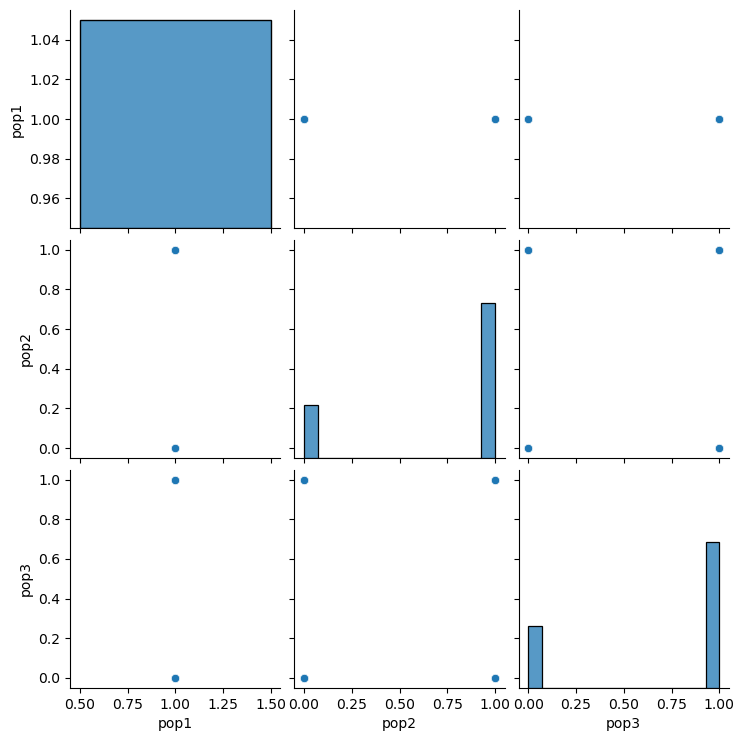

In [6]:
sns.pairplot(df[['pop1', 'pop2', 'pop3']])

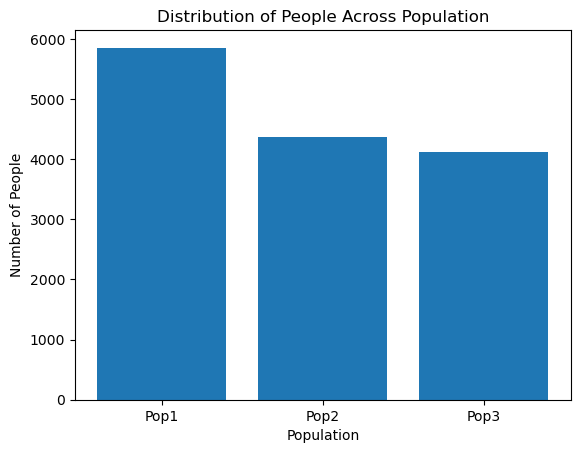

5855 4372 4114


In [7]:
# Count the number of people in each group
count_pop1 = sum(df['pop1'])
count_pop2 = sum(df['pop2'])
count_pop3 = sum(df['pop3'])

# Plotting
groups = ['Pop1', 'Pop2', 'Pop3']
counts = [count_pop1, count_pop2, count_pop3]

plt.bar(groups, counts)
plt.xlabel('Population')
plt.ylabel('Number of People')
plt.title('Distribution of People Across Population')
plt.show()
print(count_pop1, count_pop2, count_pop3)

In [8]:
df.shape

(5855, 185)

In [9]:
df.describe()

NOMEN         NOIND          ech  enf_allaite    pop1  \
count  5.855000e+03  5.855000e+03  5855.000000    19.000000  5855.0   
mean   3.274297e+06  3.274297e+08     1.460803     1.526316     1.0   
std    1.497739e+06  1.497739e+08     0.498504     0.512989     0.0   
min    1.101001e+06  1.101001e+08     1.000000     1.000000     1.0   
25%    2.159014e+06  2.159014e+08     1.000000     1.000000     1.0   
50%    3.206008e+06  3.206008e+08     1.000000     2.000000     1.0   
75%    4.273004e+06  4.273005e+08     2.000000     2.000000     1.0   
max    8.292078e+06  8.292078e+08     2.000000     2.000000     1.0   

              pop2         pop3  pond_indiv_adu_pop1  pond_indiv_enf_pop1  \
count  5855.000000  5855.000000          3157.000000          2698.000000   
mean      0.746712     0.702647         14375.304501          5138.280819   
std       0.434931     0.457132         14804.095492          4959.844186   
min       0.000000     0.000000           627.803973           132.869792   
25%       0.000000     0.000000          5865.196714          1984.521880   
50%       1.000000     1.000000          9723.514909          3519.286374   
75%       1.000000     1.000000         17110.437117          6448.629407   
max       1.000000     1.000000        140541.756916         40642.278310   

       pond_indiv_adu_pop2  pond_indiv_enf_pop2  pond_indiv_adu_pop3  \
count          2288.000000          2084.000000          2121.000000   
mean          19835.199721          6652.147395         21188.762742   
std           22086.759260          6968.621347         24156.688829   
min            1066.423684           161.665972          1003.659200   
25%            7224.367971          2319.015735          7421.419900   
50%           13044.756614          4384.742106         13967.738000   
75%           23663.071021          8304.815685         25714.449000   
max          180198.194018         55382.004653        259666.390000   

       pond_indiv_enf_pop3  pond_men_pop1  pond_men_pop2       strate  \
count          1993.000000    5855.000000    4372.000000  5855.000000   
mean           6918.260975    4391.110095    5874.979527     8.662169   
std            7404.195415    5344.216369    7447.639716     6.734556   
min             141.099910     221.279940     312.963669     1.000000   
25%            2414.500000    1170.539565    1486.586392     3.000000   
50%            4489.104500    2398.717507    3206.048866     6.000000   
75%            8516.337900    5357.234671    7003.935154    13.000000   
max           72728.766000   48883.332669   70150.667249    24.000000   

              fpc1         fpc2         fpc3  saison_pop1  saison_pop2  \
count  5855.000000  5855.000000  5855.000000  5855.000000  4372.000000   
mean      0.196449     0.074623     0.639428     2.128608     2.188243   
std       0.355454     0.073215     0.265783     1.054231     1.073385   
min       0.031746     0.000829     0.142857     1.000000     1.000000   
25%       0.038265     0.013458     0.500000     1.000000     1.000000   
50%       0.038801     0.045256     0.500000     2.000000     2.000000   
75%       0.042194     0.141914     1.000000     3.000000     3.000000   
max       1.000000     0.251351     1.000000     4.000000     4.000000   

       saison_pop3  region_adm_12cl  region_inca3    agglo_5cl       sex_PS  \
count  4114.000000      5855.000000   5855.000000  5855.000000  5855.000000   
mean      2.246719         6.606490      4.388215     2.792143     1.524680   
std       1.049537         3.617456      2.255184     1.442441     0.499433   
min       1.000000         1.000000      1.000000     1.000000     1.000000   
25%       1.000000         3.000000      2.000000     1.000000     1.000000   
50%       2.000000         7.000000      5.000000     3.000000     2.000000   
75%       3.000000         9.000000      6.000000     4.000000     2.000000   
max       4.000000        12.000000      8.000000     5.000000     2.00000

In [10]:
df_OCCASIONS.shape

(131097, 13)

In [11]:
df_OCCASIONS['R24_nombre'].value_counts()

R24_nombre
3    128207
2      2890
Name: count, dtype: int64

In [12]:
df_OCCASIONS['occ_ouinon'].value_counts()

occ_ouinon
1    72998
0    58099
Name: count, dtype: int64

In [14]:
df_consumption.shape

(256301, 109)

In [15]:
df_consumption.head()

POPULATION      NOIND  NUM_LIGNE  R24_num  R24_nombre  R24_pond occ_hdeb  \
0       Pop3  110100101          3        1           3       1.0    11:00   
1       Pop3  110100101         16        1           3       1.0    12:30   
2       Pop3  110100101     800001        1           3       1.0    12:30   
3       Pop3  110100101          6        1           3       1.0    12:30   
4       Pop3  110100101         14        1           3       1.0    12:30   

   occ_type  occ_lieu occ_alim_libelle  occ_alim_num  occ_alim_num_seq  \
0         4         1              eau             1                 1   
1         5         1     jus d orange             4                 1   
2         5         1           poulet             3                 1   
3         5         1           frites             1                 1   
4         5         1           poulet             3                 2   

   gpe_INCA3  aliment_code_INCA3                     aliment_libelle_INCA3  \
0         30                1504                          eau (du robinet)   
1         32                3246                jus de fruits 100% pur jus   
2         12                4237            matière grasse de cuisson n.s.   
3         23                4127  frite (de pommes de terre) à la friteuse   
4         36                 850                          nugget de poulet   

                                           aliment_code_FX  \
0                                                    A03DL   
1                                A03AM#F22.A07SK$F26.A07XE   
2                                          A036M#F28.A0BA1   
3            A011N#F17.A07MZ$F22.A07SK$F26.A07XE$F28.A07GV   
4  A03VV#F04.A01SP$F22.A07SP$F26.A07XE$F28.A07HK$F28.A0BA1   

                                                                                                           aliment_libelle_FX  \
0                                                                                                                   Tap water   
1                                                                       Juice, orange, Restaurant or fast food prepared,Other   
2       Animal and vegetable fats and oils and primary derivatives thereof, Cooking and similar thermal preparation processes   
3                                      Fries (finger chips), Restaurant or fast food prepared,Other,Outside brown,Deep frying   
4  Meat based dishes, Restaurant prepared,Other,Chicken fresh meat,Breading,Cooking and similar thermal preparation processes   

   qte_conso  qte_conso_pond facette_01 facette_01_libelle  facette_02  \
0     147.50          147.50        999      non renseigné         999   
1     500.00          500.00        999      non renseigné         999   
2       3.22            3.22        999      non renseigné         999   
3     107.00          107.00        999      non renseigné         999   
4     161.00          161.00         07    poulet ou poule         999   

  facette_02_libelle  facette_03                       facette_03_libelle  \
0      non renseigné         999                            non renseigné   
1      non renseigné         999                            non renseigné   
2      non renseigné         999                            non renseigné   
3      non renseigné          10                       cuit à la friteuse   
4      non renseigné          95  cuit sans précision avec matière grasse   

  facette_04                                      facette_04_libelle  \
0        999                                           non renseigné   
1        999                                           non renseigné   
2        999                                           non renseigné   
3        999                                           non renseigné   
4         00  ne connait pas la méthode de conservation de l’aliment   

   facette_05 facette_05_libelle facette_06 facette_06_libelle facette_07  \
0         999      non renseigné        999      non 

In [16]:
# INCA3 code of the food 

df_consumption['aliment_code_INCA3'].nunique()

2857

In [17]:
df_consumption['aliment_code_FX'].nunique()
# FOODEX 2 code of the food 

30806

In [18]:
df_consumption['aliment_libelle_FX'][:5]
# FOODEX 2 description of the food

0                                                                                                                     Tap water
1                                                                         Juice, orange, Restaurant or fast food prepared,Other
2         Animal and vegetable fats and oils and primary derivatives thereof, Cooking and similar thermal preparation processes
3                                        Fries (finger chips), Restaurant or fast food prepared,Other,Outside brown,Deep frying
4    Meat based dishes, Restaurant prepared,Other,Chicken fresh meat,Breading,Cooking and similar thermal preparation processes
Name: aliment_libelle_FX, dtype: object

In [19]:
df_consumption[df_consumption['facette_01'] == '05,07,09']['facette_01_libelle']
# facette_01 : animal origin of the food, this column is of type string object and it has more than one code like 05,07,09

246228    porc ; poulet ou poule ; dinde ou dindonneau
Name: facette_01_libelle, dtype: object

### Nomencluture table
This table provides the nomenclature of foods reported during the two or three 24-hour recall days for the 4114 individuals in the Pop3 population according to three
different classifications: INCA3, GloboDiet and FOODEX 2.

In [20]:
df_nomen[1250:].head(10)

gpe_INCA3  aliment_code_INCA3 aliment_libelle_INCA3  \
1250          4                 503              riz n.s.   
1251          4                 503              riz n.s.   
1252          4                 503              riz n.s.   
1253          4                 503              riz n.s.   
1254          4                 503              riz n.s.   
1255          4                 503              riz n.s.   
1256          4                 503              riz n.s.   
1257          4                 503              riz n.s.   
1258          4                 503              riz n.s.   
1259          4                 507           riz parfumé   

     aliment_synonyme_INCA3 aliment_libelle_INCA3_EN  gpe_GloboDiet  \
1250                    NaN                rice n.s.              6   
1251                    NaN                rice n.s.              6   
1252                    NaN                rice n.s.              6   
1253                    NaN                rice n.s.              6   
1254                    NaN                rice n.s.              6   
1255                    NaN                rice n.s.              6   
1256                    NaN                rice n.s.              6   
1257                    NaN                rice n.s.              6   
1258                    NaN                rice n.s.              6   
1259  riz thaï, riz basmati          rice, flavoured              6   

      gpe_GloboDiet_EN  sgpe_GloboDiet  sgpe_GloboDiet_EN  ssgpe_GloboDiet  \
1250                 6              62                 62              NaN   
1251                 6              62                 62              NaN   
1252                 6              62                 62              NaN   
1253                 6              62                 62              NaN   
1254                 6              62                 62              NaN   
1255                 6              62                 62              NaN   
1256                 6              62                 62              NaN   
1257                 6              62                 62              NaN   
1258                 6              62                 62              NaN   
1259                 6              62                 62              NaN   

      ssgpe_GloboDiet_EN facette_01  facette_02  facette_03 facette_04  \
1250                 NaN        NaN         NaN         9.0         18   
1251                 NaN        NaN         NaN        94.0         00   
1252                 NaN        NaN         NaN        94.0         18   
1253                 NaN        NaN         NaN        95.0         00   
1254                 NaN        NaN         NaN        97.0         01   
1255                 NaN        NaN         NaN        97.0         02   
1256                 NaN        NaN         NaN         3.0         18   
1257                 NaN        NaN         NaN        97.0         17   
1258                 NaN        NaN         NaN        43.0         18   
1259                 NaN        NaN         NaN         4.0         00   

      facette_05 facette_06 facette_07  facette_08 facette_09  facette_10  \
1250         NaN        NaN        NaN         NaN        NaN         NaN   
1251         NaN        NaN        NaN         NaN        NaN         NaN   
1252         NaN        NaN        NaN         NaN        NaN         NaN   
1253         NaN        NaN        NaN         NaN        NaN         NaN   
1254        99.0        NaN        NaN         NaN        NaN         NaN   
1255         NaN        NaN        NaN         NaN        NaN         NaN   
1256         NaN        NaN        NaN         NaN        NaN         NaN   
1257         NaN        NaN        NaN         NaN        NaN         NaN   
1258         NaN        NaN        NaN         NaN        NaN         NaN   
1259         NaN        NaN        NaN         NaN        NaN         NaN   

      facette_13  facette_14  

In [9]:
# export english and french food names
df = df_nomen[['aliment_libelle_INCA3','aliment_libelle_INCA3_EN']]
df.to_csv("../ressources/inca3/food_label_fr_en.csv")

In [31]:
# no null value for any of the below given groups
#  df_nomen[df_nomen['gpe_INCA3'].isnull()] 
# df_nomen[df_nomen['gpe_GloboDiet'].isnull()]
# df_nomen[df_nomen['aliment_code_FX'].isnull()]

Empty DataFrame
Columns: [gpe_INCA3, aliment_code_INCA3, aliment_libelle_INCA3, aliment_synonyme_INCA3, aliment_libelle_INCA3_EN, gpe_GloboDiet, gpe_GloboDiet_EN, sgpe_GloboDiet, sgpe_GloboDiet_EN, ssgpe_GloboDiet, ssgpe_GloboDiet_EN, facette_01, facette_02, facette_03, facette_04, facette_05, facette_06, facette_07, facette_08, facette_09, facette_10, facette_13, facette_14, facette_19, facette_20, facette_25, facette_27, aliment_code_FX, aliment_libelle_FX, gpe_code_FX, gpe_libelle_FX, sgpe_code_FX, sgpe_libelle_FX, ssgpe_code_FX, ssgpe_libelle_FX, Freq]
Index: []

In [32]:
df_consumption.head()

POPULATION      NOIND  NUM_LIGNE  R24_num  R24_nombre  R24_pond occ_hdeb  \
0       Pop3  110100101          3        1           3       1.0    11:00   
1       Pop3  110100101         16        1           3       1.0    12:30   
2       Pop3  110100101     800001        1           3       1.0    12:30   
3       Pop3  110100101          6        1           3       1.0    12:30   
4       Pop3  110100101         14        1           3       1.0    12:30   

   occ_type  occ_lieu occ_alim_libelle  occ_alim_num  occ_alim_num_seq  \
0         4         1              eau             1                 1   
1         5         1     jus d orange             4                 1   
2         5         1           poulet             3                 1   
3         5         1           frites             1                 1   
4         5         1           poulet             3                 2   

   gpe_INCA3  aliment_code_INCA3                     aliment_libelle_INCA3  \
0         30                1504                          eau (du robinet)   
1         32                3246                jus de fruits 100% pur jus   
2         12                4237            matière grasse de cuisson n.s.   
3         23                4127  frite (de pommes de terre) à la friteuse   
4         36                 850                          nugget de poulet   

                                           aliment_code_FX  \
0                                                    A03DL   
1                                A03AM#F22.A07SK$F26.A07XE   
2                                          A036M#F28.A0BA1   
3            A011N#F17.A07MZ$F22.A07SK$F26.A07XE$F28.A07GV   
4  A03VV#F04.A01SP$F22.A07SP$F26.A07XE$F28.A07HK$F28.A0BA1   

                                                                                                           aliment_libelle_FX  \
0                                                                                                                   Tap water   
1                                                                       Juice, orange, Restaurant or fast food prepared,Other   
2       Animal and vegetable fats and oils and primary derivatives thereof, Cooking and similar thermal preparation processes   
3                                      Fries (finger chips), Restaurant or fast food prepared,Other,Outside brown,Deep frying   
4  Meat based dishes, Restaurant prepared,Other,Chicken fresh meat,Breading,Cooking and similar thermal preparation processes   

   qte_conso  qte_conso_pond facette_01 facette_01_libelle  facette_02  \
0     147.50          147.50        999      non renseigné         999   
1     500.00          500.00        999      non renseigné         999   
2       3.22            3.22        999      non renseigné         999   
3     107.00          107.00        999      non renseigné         999   
4     161.00          161.00         07    poulet ou poule         999   

  facette_02_libelle  facette_03                       facette_03_libelle  \
0      non renseigné         999                            non renseigné   
1      non renseigné         999                            non renseigné   
2      non renseigné         999                            non renseigné   
3      non renseigné          10                       cuit à la friteuse   
4      non renseigné          95  cuit sans précision avec matière grasse   

  facette_04                                      facette_04_libelle  \
0        999                                           non renseigné   
1        999                                           non renseigné   
2        999                                           non renseigné   
3        999                                           non renseigné   
4         00  ne connait pas la méthode de conservation de l’aliment   

   facette_05 facette_05_libelle facette_06 facette_06_libelle facette_07  \
0         999      non renseigné        999      non 

In [35]:
df_consumption[df_consumption['aliment_code_FX'].isnull()]

Empty DataFrame
Columns: [POPULATION, NOIND, NUM_LIGNE, R24_num, R24_nombre, R24_pond, occ_hdeb, occ_type, occ_lieu, occ_alim_libelle, occ_alim_num, occ_alim_num_seq, gpe_INCA3, aliment_code_INCA3, aliment_libelle_INCA3, aliment_code_FX, aliment_libelle_FX, qte_conso, qte_conso_pond, facette_01, facette_01_libelle, facette_02, facette_02_libelle, facette_03, facette_03_libelle, facette_04, facette_04_libelle, facette_05, facette_05_libelle, facette_06, facette_06_libelle, facette_07, facette_07_libelle, facette_08, facette_08_libelle, facette_09, facette_09_libelle, facette_10, facette_10_libelle, facette_12, facette_12_libelle, aliment_marque_bio, aliment_marque_enrichi, facette_13, facette_13_libelle, facette_14, facette_14_libelle, facette_19, facette_19_libelle, facette_20, facette_20_libelle, facette_25, facette_25_libelle, facette_27, facette_27_libelle, aet, aesa, proteines, glucides, sucres, amidon, polyols, fibres, acides_organiques, lipides, ags, ag_16_0, ag_18_0, ag_14_0, ag_12_0, ag_10_0, ag_04_0, ag_06_0, ag_08_0, agmi, ag_18_1_ole, agpi, ag_18_2_lino, ag_18_3_a_lino, ag_20_4_ara, ag_20_5_epa, ag_20_6_dha, alcool, eau, retinol, beta_carotene, vitamine_b1, vitamine_b2, vitamine_b3, vitamine_b5, vitamine_b6, vitamine_b9, vitamine_b12, vitamine_c, vitamine_d, vitamine_e, vitamine_k2, sodium, sel, magnesium, ...]
Index: []

In [6]:
df_nomen_inca2.head()

codgr                       libgr  sougr libsougr  codal  \
0      1  pain et panification sèche      1     pain   7001   
1      1  pain et panification sèche      1     pain   7004   
2      1  pain et panification sèche      1     pain   7012   
3      1  pain et panification sèche      1     pain   7100   
4      1  pain et panification sèche      1     pain   7110   

                                     libal  
0                            pain baguette  
1                       pain grillé maison  
2  pain courant français boule à la levure  
3                  pain de campagne ou bis  
4       pain complet ou intégral artisanal

In [19]:
df_nomen_inca2['codgr'].nunique()
# df_nomen_inca2.shape
# df_nomen_inca2['codal'].nunique()
df_nomen_inca2['libgr'].value_counts().to_dict().keys()

dict_keys(['fromages', 'légumes (hors pommes de terre)', 'plats composés', 'poissons', 'condiments et sauces', 'ultra-frais laitier', 'boissons fraîches sans alcool', 'eaux', 'charcuterie', 'pâtisseries et gâteaux', 'fruits', 'boissons alcoolisées', 'viande', 'biscuits sucrés ou salés et barres', 'entremets, crèmes desserts et laits gélifiés', 'huile', 'sandwichs, casse-croûte', 'margarine', 'fruits secs et graines oléagineuses', 'pain et panification sèche', 'céréales pour petit déjeuner', 'sucres et dérivés', 'volaille et gibier', 'lait', 'pizzas, quiches et pâtisseries salées', 'crustacés et mollusques', 'soupes et bouillons', 'abats', 'chocolat', 'aliments destinés à une alimentation particulière', 'beurre', 'oeufs et dérivés', 'viennoiserie', 'pommes de terre et apparentés', 'glaces et desserts glacés', 'autres boissons chaudes', 'légumes secs', 'compotes et fruits cuits', 'café', 'autres graisses', 'riz et blé dur ou concassé', 'pâtes', 'autres céréales', '-'])

['cheese', 'vegetables (excluding potatoes)', 'mixed dishes', 'fish', 'condiments and sauces', 'ultra-fresh dairy', 'fresh non-alcoholic drinks', 'water', 'cold meats' ', 'pastries and cakes', 'fruits', 'alcoholic drinks', 'meat', 'sweet or savory biscuits and bars', 'desserts, cream desserts and gelled milks', 'oil', 'sandwiches, snacks ', 'margarine', 'dried fruits and oilseeds', 'bread and dry bread', 'breakfast cereals', 'sugars and derivatives', 'poultry and game', 'milk', 'pizzas, quiches and pastries salted foods', 'crustaceans and molluscs', 'soups and broths', 'offal', 'chocolate', 'foods intended for special diets', 'butter', 'eggs and their products', 'pastries', 'potatoes' and related products', 'ice creams and frozen desserts', 'other hot drinks', 'dried vegetables', 'stewed fruits and cooked fruits', 'coffee', 'other fats', 'rice and durum or cracked wheat', 'pasta' , 'other cereals', '-']

In [23]:
df_nomen_inca2['codal'].nunique()

1343

In [22]:
df_nomen['aliment_code_INCA3'].nunique()

2857

In [11]:
df_nomen.head()

gpe_INCA3  aliment_code_INCA3  \
0          1                2641   
1          1                 579   
2          1                2638   
3          1                 549   
4          1                 546   

                            aliment_libelle_INCA3 aliment_synonyme_INCA3  \
0                 biscotte au froment (classique)                    NaN   
1                               biscotte briochée                    NaN   
2  biscotte minceur sans sel et sans sucre ajouté                    NaN   
3                          biscotte multicéréales                    NaN   
4                                   biscotte n.s.                    NaN   

         aliment_libelle_INCA3_EN  gpe_GloboDiet  gpe_GloboDiet_EN  \
0                   rusk, wheaten              6                 6   
1                   rusk, brioche              6                 6   
2  rusk, salt free and sugar free              6                 6   
3             rusk, multi-cereals              6                 6   
4                       rusk n.s.              6                 6   

   sgpe_GloboDiet  sgpe_GloboDiet_EN  ssgpe_GloboDiet  ssgpe_GloboDiet_EN  \
0              63                 63            632.0               632.0   
1              63                 63            632.0               632.0   
2              63                 63            632.0               632.0   
3              63                 63            632.0               632.0   
4              63                 63            632.0               632.0   

  facette_01  facette_02  facette_03 facette_04  facette_05 facette_06  \
0        NaN         NaN         NaN        NaN         NaN        NaN   
1        NaN         NaN         NaN        NaN         NaN        NaN   
2        NaN         NaN         NaN        NaN         NaN        NaN   
3        NaN         NaN         NaN        NaN         NaN         18   
4        NaN         NaN         NaN        NaN         NaN        NaN   

  facette_07  facette_08 facette_09  facette_10  facette_13  facette_14  \
0        NaN         NaN        NaN         NaN         NaN         NaN   
1        NaN         NaN        NaN         NaN         NaN         NaN   
2        NaN         NaN        NaN         NaN         NaN         NaN   
3        NaN         NaN        NaN         NaN         NaN         NaN   
4        NaN         NaN        NaN         NaN         NaN         NaN   

   facette_19 facette_20 facette_25  facette_27  \
0         NaN        NaN        NaN         NaN   
1         NaN        NaN        NaN         NaN   
2         NaN        NaN        NaN         NaN   
3         NaN        NaN        NaN         NaN   
4         NaN        NaN        NaN         NaN   

                       aliment_code_FX  \
0                      A006M#F10.A07XK   
1                      A006M#F12.A008M   
2  A006M#F10.A0CRG$F10.A0CQE$F10.A077K   
3                      A006M#F04.A001X   
4                                A006M   

                                   aliment_libelle_FX gpe_code_FX  \
0                                 Rusk, White/refined       A000J   
1              Rusk, Fine yeast sweet dough (brioche)       A000J   
2  Rusk, Light,Without added salt,Without added sugar       A000J   
3                             Rusk, Mixture of grains       A000J   
4                                                Rusk       A000J   

                    gpe_libelle_FX sgpe_code_FX             sgpe_libelle_FX  \
0  Grains and grain-based products        A004V  Bread and similar products   
1  Grains and grain-based products        A004V  Bread and similar products   
2  Grains and grain-based products        A004V  Bread and similar products   
3  Grains and grain-based products        A004V  Bread and similar products   
4  Grains and grain-based products        A004V  Bread and similar products   

  ssgpe_code_FX ssgpe_libelle_FX  Freq  
0         A006M             Rusk   384  
1         A006M  

In [27]:
df_consumption[:5]['aliment_code_INCA3','aliment_libelle_INCA3','aliment_code_FX','aliment_libelle_FX']]

aliment_code_INCA3                     aliment_libelle_INCA3  \
0                1504                          eau (du robinet)   
1                3246                jus de fruits 100% pur jus   
2                4237            matière grasse de cuisson n.s.   
3                4127  frite (de pommes de terre) à la friteuse   
4                 850                          nugget de poulet   

                                           aliment_code_FX  \
0                                                    A03DL   
1                                A03AM#F22.A07SK$F26.A07XE   
2                                          A036M#F28.A0BA1   
3            A011N#F17.A07MZ$F22.A07SK$F26.A07XE$F28.A07GV   
4  A03VV#F04.A01SP$F22.A07SP$F26.A07XE$F28.A07HK$F28.A0BA1   

                                                                                                           aliment_libelle_FX  
0                                                                                                                   Tap water  
1                                                                       Juice, orange, Restaurant or fast food prepared,Other  
2       Animal and vegetable fats and oils and primary derivatives thereof, Cooking and similar thermal preparation processes  
3                                      Fries (finger chips), Restaurant or fast food prepared,Other,Outside brown,Deep frying  
4  Meat based dishes, Restaurant prepared,Other,Chicken fresh meat,Breading,Cooking and similar thermal preparation processes

In [5]:
df_nomen.head()

gpe_INCA3  aliment_code_INCA3  \
0          1                2641   
1          1                 579   
2          1                2638   
3          1                 549   
4          1                 546   

                            aliment_libelle_INCA3 aliment_synonyme_INCA3  \
0                 biscotte au froment (classique)                    NaN   
1                               biscotte briochée                    NaN   
2  biscotte minceur sans sel et sans sucre ajouté                    NaN   
3                          biscotte multicéréales                    NaN   
4                                   biscotte n.s.                    NaN   

         aliment_libelle_INCA3_EN  gpe_GloboDiet  gpe_GloboDiet_EN  \
0                   rusk, wheaten              6                 6   
1                   rusk, brioche              6                 6   
2  rusk, salt free and sugar free              6                 6   
3             rusk, multi-cereals              6                 6   
4                       rusk n.s.              6                 6   

   sgpe_GloboDiet  sgpe_GloboDiet_EN  ssgpe_GloboDiet  ssgpe_GloboDiet_EN  \
0              63                 63            632.0               632.0   
1              63                 63            632.0               632.0   
2              63                 63            632.0               632.0   
3              63                 63            632.0               632.0   
4              63                 63            632.0               632.0   

  facette_01  facette_02  facette_03 facette_04  facette_05 facette_06  \
0        NaN         NaN         NaN        NaN         NaN        NaN   
1        NaN         NaN         NaN        NaN         NaN        NaN   
2        NaN         NaN         NaN        NaN         NaN        NaN   
3        NaN         NaN         NaN        NaN         NaN         18   
4        NaN         NaN         NaN        NaN         NaN        NaN   

  facette_07  facette_08 facette_09  facette_10  facette_13  facette_14  \
0        NaN         NaN        NaN         NaN         NaN         NaN   
1        NaN         NaN        NaN         NaN         NaN         NaN   
2        NaN         NaN        NaN         NaN         NaN         NaN   
3        NaN         NaN        NaN         NaN         NaN         NaN   
4        NaN         NaN        NaN         NaN         NaN         NaN   

   facette_19 facette_20 facette_25  facette_27  \
0         NaN        NaN        NaN         NaN   
1         NaN        NaN        NaN         NaN   
2         NaN        NaN        NaN         NaN   
3         NaN        NaN        NaN         NaN   
4         NaN        NaN        NaN         NaN   

                       aliment_code_FX  \
0                      A006M#F10.A07XK   
1                      A006M#F12.A008M   
2  A006M#F10.A0CRG$F10.A0CQE$F10.A077K   
3                      A006M#F04.A001X   
4                                A006M   

                                   aliment_libelle_FX gpe_code_FX  \
0                                 Rusk, White/refined       A000J   
1              Rusk, Fine yeast sweet dough (brioche)       A000J   
2  Rusk, Light,Without added salt,Without added sugar       A000J   
3                             Rusk, Mixture of grains       A000J   
4                                                Rusk       A000J   

                    gpe_libelle_FX sgpe_code_FX             sgpe_libelle_FX  \
0  Grains and grain-based products        A004V  Bread and similar products   
1  Grains and grain-based products        A004V  Bread and similar products   
2  Grains and grain-based products        A004V  Bread and similar products   
3  Grains and grain-based products        A004V  Bread and similar products   
4  Grains and grain-based products        A004V  Bread and similar products   

  ssgpe_code_FX ssgpe_libelle_FX  Freq  
0         A006M             Rusk   384  
1         A006M  

In [4]:
df_nomen['ssgpe_libelle_FX'].value_counts()

ssgpe_libelle_FX
Dishes excluding pasta or rice dishes, sandwiches and pizza)                      3275
Mammals meat                                                                      2637
Sandwiches, pizza and other stuffed bread-like cereal products                    1921
Birds meat                                                                        1597
Soups (ready-to-eat)                                                              1281
Fermented milk products                                                           1201
Fruit / vegetable spreads and similar                                             1115
Cakes                                                                             1106
Savoury sauces                                                                    1095
Ripened cheese                                                                     926
Biscuits                                                                           768
Salads                    